# 이원분산분석 (Two-way ANOVA)

세 개 이상의 집단의 평균이 어떻게 다른지 확인하고자 할 경우 적용하는 방법.

분석을 진행하기 전, 일원분산분석과 동일하게 정규성과 등분산성이 충족되어야 한다.

두 개 이상의 요인에 대한 교효작용 여부를 알아보는 것이 목적이므로 이원분산분석 후의 사후검정은 큰 의미가 없다.

## #01. 준비작업

### [1] 패키지 참조

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, melt
from scipy.stats import t, normaltest, bartlett, levene

# 분산분석을 위한 라이브러리
from statsmodels.formula.api import ols # 회귀분석에 쓰이는 통계함수 / 출력결과가 표
from statsmodels.stats.anova import anova_lm

### [2] 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["axes.unicode_minus"] = False

## #02. 예제1 - 측정자에 따른 태아의 머리 둘레 측정 비교

다음의 데이터는 3명의 태아를 대상으로 3명의 관측자가 측정한 자료이다.

측정자에 따라 태아의 머리 둘레가 다르게 타나나는지 확인하라.

### [1] 데이터 가져오기

In [4]:
origin = read_excel("https://data.hossam.kr/mldata/head_size.xlsx")
origin

,측정자번호,1번태아,2번태아,3번태아
0,1,14.9,19.7,13.0
1,1,14.4,20.7,13.5
2,1,14.4,19.9,13.2
3,1,15.1,20.2,12.8
4,1,15.4,19.4,13.8
5,1,14.2,19.0,13.5
6,1,14.2,19.5,13.7
7,1,14.1,19.9,13.4
8,1,13.9,20.2,13.1
9,1,14.8,19.7,13.0


### [2] 태아의 측정자별 머리둘레 분포 확인

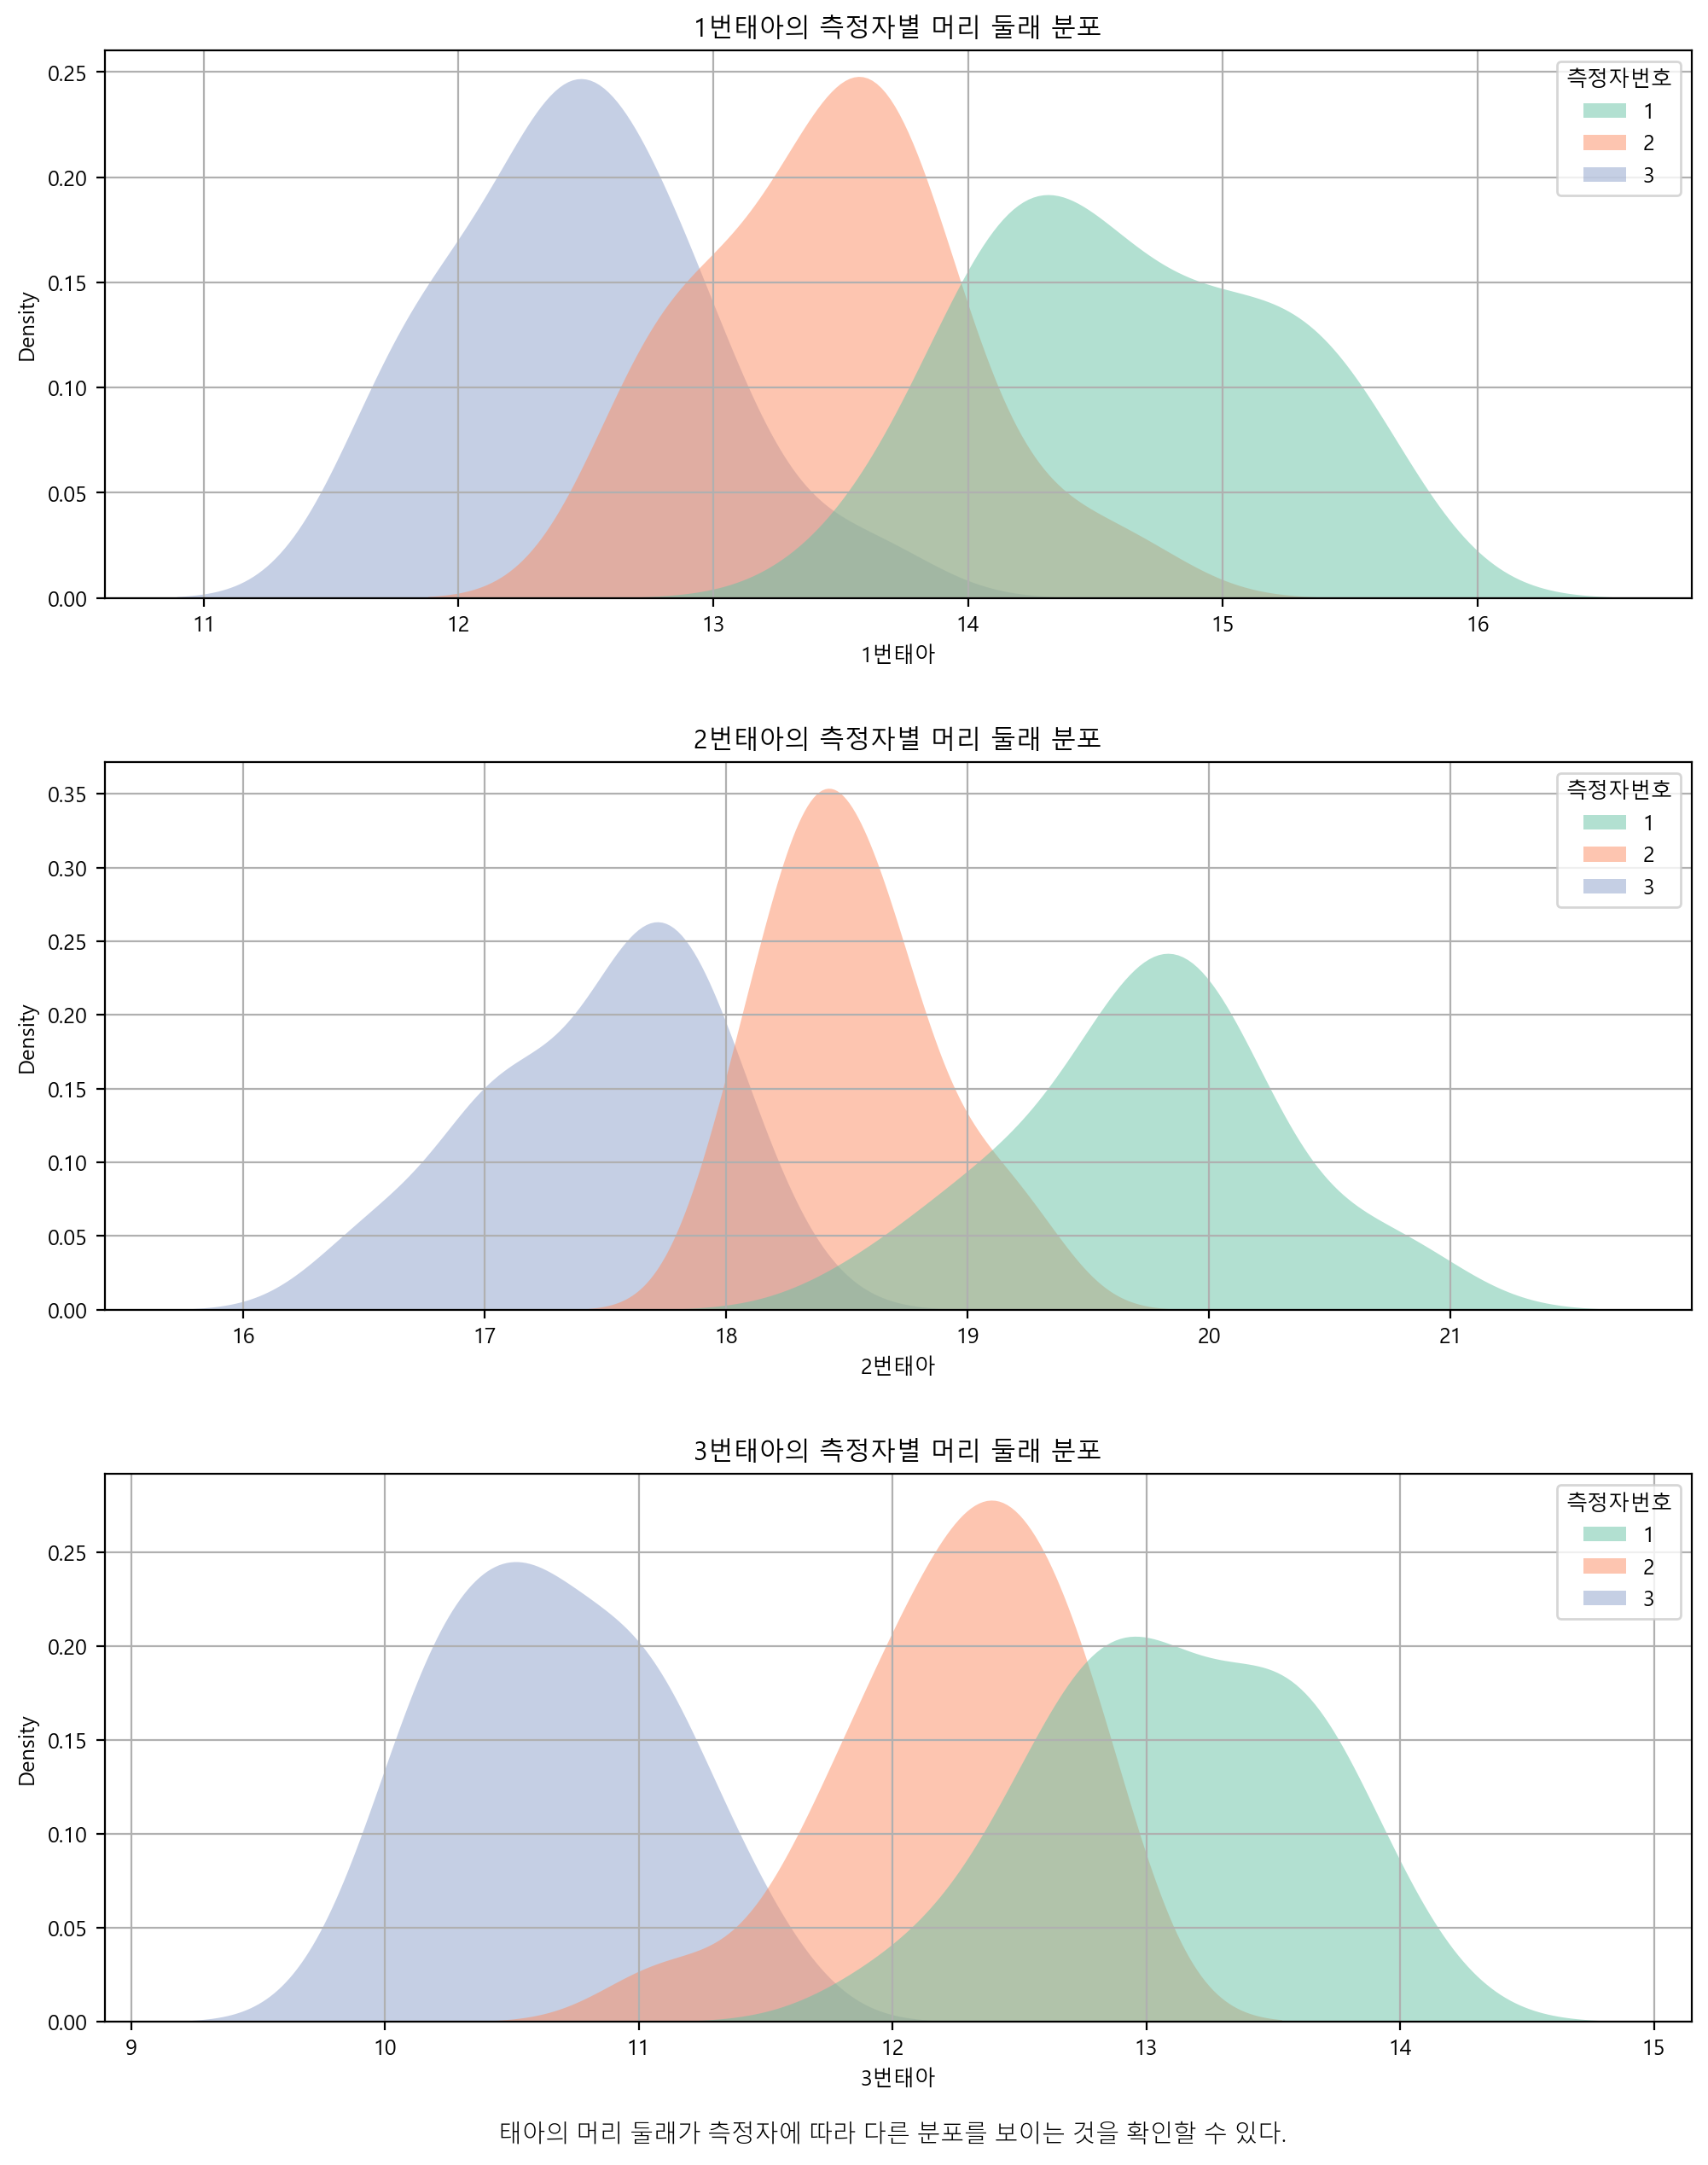

In [5]:
fields = ['1번태아', '2번태아', '3번태아']

fig, ax = plt.subplots(3, 1, figsize=(12, 15), dpi=200)
fig.subplots_adjust(hspace=0.3)

for i, v, in enumerate(ax):
    sb.kdeplot(data=origin, x=fields[i], hue='측정자번호', palette='Set2', 
               fill=True, alpha=.5, linewidth=0, ax=v)
    v.grid()
    v.set_title("%s의 측정자별 머리 둘래 분포" % fields[i])

txt = "태아의 머리 둘래가 측정자에 따라 다른 분포를 보이는 것을 확인할 수 있다."
plt.figtext(0.51, 0.07, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

### [3] 데이터 전처리

In [6]:
df = melt(origin, id_vars='측정자번호', 
     value_vars=['1번태아', '2번태아', '3번태아'], 
     var_name='태아번호', value_name='머리둘레')
df

,측정자번호,태아번호,머리둘레
0,1,1번태아,14.9
1,1,1번태아,14.4
2,1,1번태아,14.4
3,1,1번태아,15.1
4,1,1번태아,15.4
...,...,...,...
175,3,3번태아,11.0
176,3,3번태아,10.2
177,3,3번태아,10.1
178,3,3번태아,10.2


### [3] 가설검정의 가정 확인

#### (1) 정규성

In [7]:
측정자번호 = df['측정자번호'].unique()
측정자번호

array([1, 2, 3], dtype=int64)

In [8]:
태아번호 = df['태아번호'].unique()
태아번호

array(['1번태아', '2번태아', '3번태아'], dtype=object)

In [9]:
for i in 측정자번호:
    for j in 태아번호:
        data = df[(df['측정자번호'] == i) & (df['태아번호'] == j)]['머리둘레']
        s, p = normaltest(data)
        print("[{0} + {1}] statistic: {2:.3f}, p-value: {3:.3f}, 정규성 충족 여부: {4}".format(i, j, s, p, p > 0.05))

[1 + 1번태아] statistic: 1.885, p-value: 0.390, 정규성 충족 여부: True
[1 + 2번태아] statistic: 0.290, p-value: 0.865, 정규성 충족 여부: True
[1 + 3번태아] statistic: 0.409, p-value: 0.815, 정규성 충족 여부: True
[2 + 1번태아] statistic: 0.455, p-value: 0.797, 정규성 충족 여부: True
[2 + 2번태아] statistic: 1.443, p-value: 0.486, 정규성 충족 여부: True
[2 + 3번태아] statistic: 3.862, p-value: 0.145, 정규성 충족 여부: True
[3 + 1번태아] statistic: 0.667, p-value: 0.716, 정규성 충족 여부: True
[3 + 2번태아] statistic: 1.463, p-value: 0.481, 정규성 충족 여부: True
[3 + 3번태아] statistic: 0.847, p-value: 0.655, 정규성 충족 여부: True


#### (2) 등분산성

In [10]:
fields = []

for i in 측정자번호:
    for j in 태아번호:
        data = df[(df['측정자번호'] == i) & (df['태아번호'] == j)]['머리둘레']
        fields.append(data)
        
s, p = bartlett(*fields)
print("statistic: {0:.3f}, p-value: {1:.3f}, 등분산성 충족 여부: {2}".format(s, p, p > 0.05))

statistic: 6.132, p-value: 0.632, 등분산성 충족 여부: True


### [3] 분산분석 수행

`stats` 패키지는 일원분산분석만 지원한다.

이원분산분석은 `statsmodels` 패키지가 지원한다.

In [11]:
#formula = '머리둘레 ~ C(태아번호)+C(측정자번호)+C(태아번호):C(측정자번호)'
formula = '머리둘레 ~ C(태아번호)*C(측정자번호)'
lm = ols(formula, df).fit()
anova = anova_lm(lm)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(태아번호),2.0,1422.825444,711.412722,3008.013241,5.616407e-134
C(측정자번호),2.0,159.320778,79.660389,336.822068,4.904107e-60
C(태아번호):C(측정자번호),4.0,2.201222,0.550306,2.326816,5.827850e-02
Residual,171.0,40.442500,0.236506,NaN,NaN


> 태아번호에 대한 p값은 0.05보다 작으므로 통계적으로 유의한 차이를 보인다고 할 수 있다.
>
> 측정자번호에 대한 p값 역시 0.05보다 작으므로 통계적으로 유의한 차이를 보인다고 할 수 있다.
>
> 하지만 태아와 측정자에 대한 p값은 0.05보다 크기 때문에 태아의 머리 둘레와 측정자간에는 연관성이 없다고 할 수 있다.

## #03. 예제2 - 햇빛 노출과 관수 빈도에 따른 식물 성장의 영향 알아보기

한 식물학자는 식물의 성장이 햇빛 노출과 관수 빈도에 의해 영향을 받는지 여부를 알고 싶어한다.

실험은 씨앗을 심고 햇빛 노출과 물 주기를 다른 조건으로 하여 두 달 동안 자라게 한 후 각 식물의 높이를 인치 단위로 기록하였다.

### [1] 데이터 가져오기

| 필드 | 설명 | 값 |
|---|---|---|
| water | 각 실물에 물을 주는 빈도 | 매일:`daily`, 매주: `weekly` |
| sun | 각 식물이 받은 햇빛 노출량 | 낮음:`low`, 중간:`med`, 높음:`high` |
| height | 2개월 후 각 식물의 높이 | 인치 |

In [22]:
origin = read_excel("https://data.hossam.kr/mldata/plant_growth.xlsx")
origin

,water,sun,height
0,daily,low,4.9
1,daily,low,7.9
2,daily,low,3.9
3,daily,low,5.1
4,daily,low,5.2
...,...,...,...
115,weekly,high,5.4
116,weekly,high,5.9
117,weekly,high,5.6
118,weekly,high,5.3


### [2] 데이터 분포 시각화

#### (1) 관수빈도별 햇빛 노출 빈도에 따른 식물 높이 비교

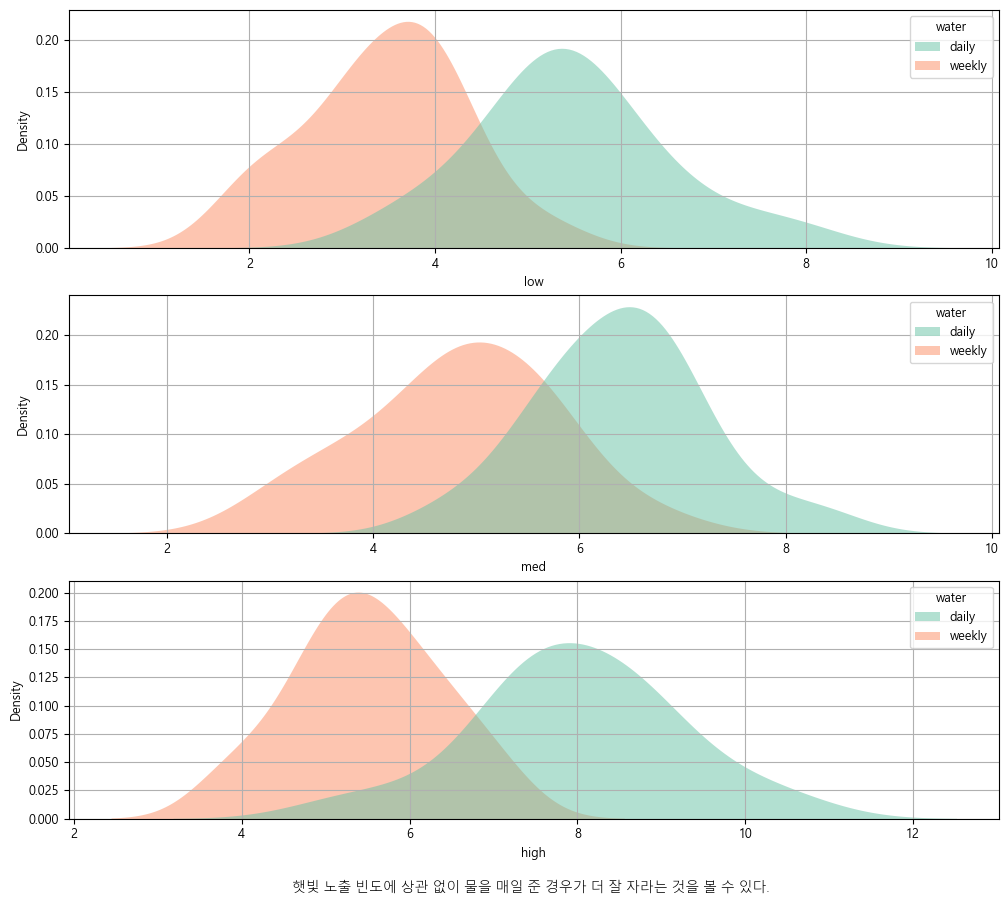

In [20]:
sun = origin['sun'].unique()
s = len(sun)

fig, ax = plt.subplots(s, 1, figsize=(12, 3.5*s))

for i, v in enumerate(ax):
    data = origin[origin['sun'] == sun[i]]
    sb.kdeplot(data=data, x='height', hue='water', palette='Set2', 
               fill=True, alpha=.5, linewidth=0, ax=v)
    v.grid()
    v.set_xlabel(sun[i])

txt = """햇빛 노출 빈도에 상관 없이 물을 매일 준 경우가 더 잘 자라는 것을 볼 수 있다."""

plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
    
plt.show()
plt.close()

#### (2) 햇빛 노출 빈도별 관수량에 따른 식물 높이 비교

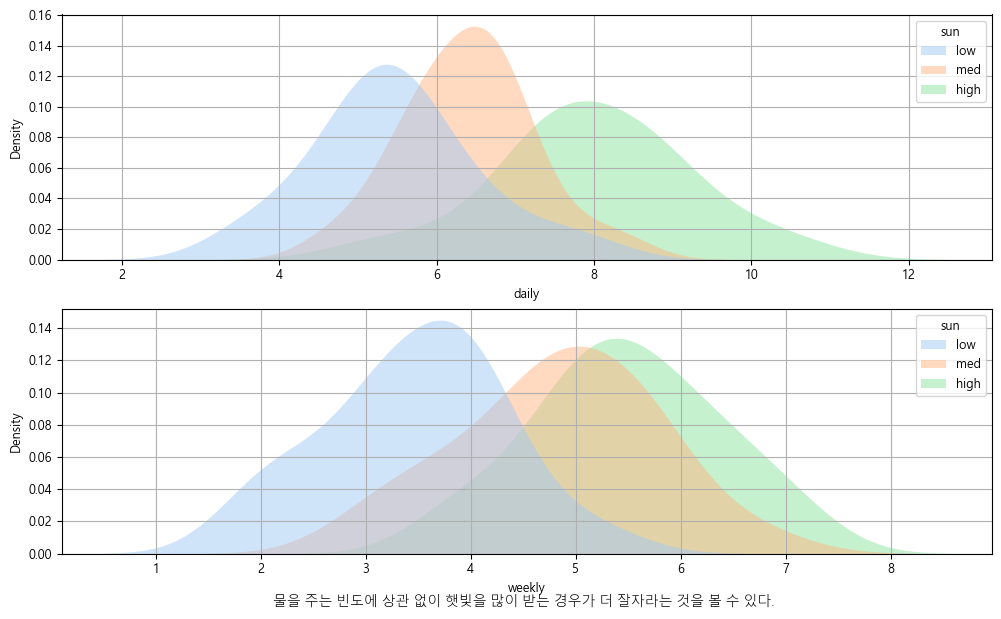

In [21]:
water = origin['water'].unique()
s = len(water)

fig, ax = plt.subplots(s, 1, figsize=(12, 3.5*s))

for i, v in enumerate(ax):
    data = origin[origin['water'] == water[i]]
    sb.kdeplot(data=data, x='height', hue='sun', palette='pastel', 
               fill=True, alpha=.5, linewidth=0, ax=v)
    v.grid()
    v.set_xlabel(water[i])
    
txt = """물을 주는 빈도에 상관 없이 햇빛을 많이 받는 경우가 더 잘자라는 것을 볼 수 있다."""

plt.figtext(0.51, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
    
plt.show()
plt.close()

### [3] 분산분석의 가정 확인

#### (1) 정규성

In [15]:
water = origin['water'].unique()
sun = origin['sun'].unique()

for i in water:
    for j in sun:
        data = origin[(origin['water'] == i) & (origin['sun'] == j)]['height']
        s, p = normaltest(data)
        print("[{0} + {1}] statistic: {2:.3f}, p-value: {3:.3f}, 정규성 충족 여부: {4}".format(i, j, s, p, p > 0.05))

[daily + low] statistic: 1.462, p-value: 0.482, 정규성 충족 여부: True
[daily + med] statistic: 0.867, p-value: 0.648, 정규성 충족 여부: True
[daily + high] statistic: 0.802, p-value: 0.670, 정규성 충족 여부: True
[weekly + low] statistic: 0.074, p-value: 0.964, 정규성 충족 여부: True
[weekly + med] statistic: 0.161, p-value: 0.923, 정규성 충족 여부: True
[weekly + high] statistic: 0.053, p-value: 0.974, 정규성 충족 여부: True


#### (2) 등분산성

In [16]:
fields = []

for i in water:
    for j in sun:
        data = origin[(origin['water'] == i) & (origin['sun'] == j)]['height']
        fields.append(data)
        
s, p = bartlett(*fields)
print("statistic: {0:.3f}, p-value: {1:.3f}, 등분산성 충족 여부: {2}".format(s, p, p > 0.05))

statistic: 4.488, p-value: 0.481, 등분산성 충족 여부: True


### [4] 이원분산분석

In [17]:
#formula = '머리둘레 ~ C(태아번호)+C(측정자번호)+C(태아번호):C(측정자번호)'
formula = 'height ~ C(water)*C(sun)'
lm = ols(formula, origin).fit()
anova = anova_lm(lm, tpy=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(water),1.0,122.816333,122.816333,130.528994,1.301312e-20
C(sun),2.0,103.292167,51.646083,54.889371,2.013276e-17
C(water):C(sun),2.0,4.327167,2.163583,2.299453,1.049489e-01
Residual,114.0,107.264000,0.940912,NaN,NaN


> 관수량에 대한 p값이 0.05보다 작으므로 관수량에 따른 식물 키의 평균은 통계적으로 유의미한 차이가 있다.
>
> 햇빛 노출 빈도에 대한 p값이 0.05보다 작으므로 햇빛 노출 빈도에 따른 식물 키의 평균은 통계적으로 유의미한 차이가 있다.
>
> 관수량과 햇빛 노출 빈도에 대한 p값이 0.05보다 크므로 관수량과 햇빛 노출량의 상호작용이 식물 키에 교효작용이 없다고 볼 수 있다.